# Analisi delle componenti principali

### Rights & Credits
Questo notebook è stato realizzato da Agostino Migliore.

## 1 Introduzione
L'<span style="color:blue">analisi delle componenti principali</span> (in inglese <span style="color:blue">principal component analysis</span>, abbreviata come <span style="color:blue">PCA</span>), nota anche come <span style="color:blue">trasformata di Karhunen-Loève</span>, è un metodo di semplificazione dei dati. Esso consiste nel ridurre la dimensionalità di un set di dati, al contempo limitando il più possibile la conseguente perdita di informazioni. L'obiettivo è di riuscire a descrivere un dato sistema in modo chiaro e sufficientemente accurato usando un numero ridotto di variabili.

Si supponga, per esempio, di simulare con *dinamica molecolare* (MD) l'aggancio di un substrato da parte di un enzima in un solvente. Le conformazioni assunte dal sistema macromolecolare solvatato dipendono da un numero molto elecato di coordinate nucleari. Tuttavia, molte coordinate descrivono la struttura interna della proteina e quella del substrato, mentre poche coordinate descrivono alterazioni sostanziali della configurazione del sistema e, in particolare, del reciproco posizionamento dei due componenti man mano che si avvicinano. La PCA, opportunamente applicata, consente di individuare il set minimo di coordinate per descrivere l'ancoraggio del substrato all'enzima, così fornendo informazioni sulle parti delle molecole più coinvolte nell'ancoraggio e sul corrispondente meccanismo macromolecolare. Per esempio, assumiamo che la distanza tra lo ione al centro di un sito attivo della proteina e il centro di carica del substrato sia un parametro essenziale e che la direzione congiungente tali due punti sia stata individuata, tramite la PCA, come quella lungo la quale avvengono le maggiori variazioni strutturali del sistema macromolecolare. Il sistema è quindi soggetto alla più grande varianza degli spostamenti atomici proiettati lungo tale direzione. Per esempio, gli atomi di alcuni residui amminoacidici potrebbero manifestare gli postamenti più grandi in tale direzione, fornendoci l'informazione che il riarrangiamento delle posizioni di tali residui è essenziale per l'ancoraggio delle due molecole.

In generale, la PCA è una tecnica di analisi per l'esplorazione, visualizzazione e processamento di dati, sfruttata molto nel <span style="color:blue">machine learning</span> (<span style="color:blue">ML</span>). Si consideri, per esempio, il set di punti di dati nella figura seguente. Ciascun dato è descritto da due coordinate e, in realtà, un obiettivo frequente della PCA è perveniere alla rappresentazione approssimata di dati multidimensioni tramite un set di dati bidimensionali che possano essere facilmente visualizzati, magari per identificare gruppi di dati strettamente correlati. Per esempio, un set di $n$ sensori rileva la distribuzione dell'intensità luminosa su un sistema a $N$ intervalli di tempo successivi, per valutare le fluttuazioni di intensità luminosa nel sistema e individuare le zone di più marcata illuminazione in media. Ciascun set di $D$ valori di intensità è un dato $D$-dimensionale e vi sono $N$ dati a disposizione. La PCA interviene per caratterizzare la distribuzione dell'intensità luminosa e le sue fluttuazioni nelle linee essenziali, pervenendo a un set bidimensionale di dati di illuminazione che riesce a descrivere la zona di maggiore illuminazione in media e le sue fluttuazioni nel tempo.

<pass/> <div style="width: 500px">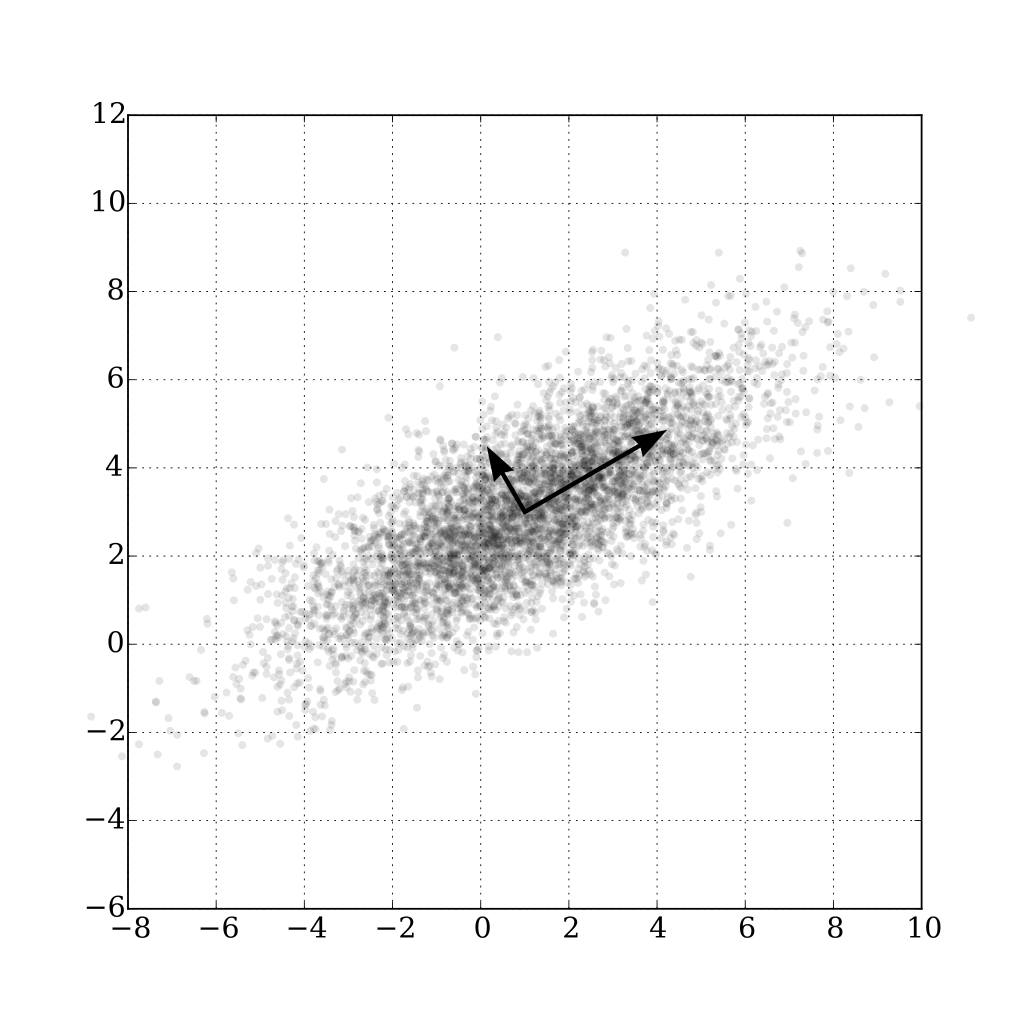</div>
<font size="2">**Figura 1.** Immagine tratta da https://en.wikipedia.org/wiki/Principal_component_analysis#/media/File:GaussianScatterPCA.svg</font>.

Nel nostro caso,  partiamo già da un set di dati bidimensionali del tipo di quello mostrato in figura. Esso può rappresentare già un caso molto concreto. Per esempio, si consideri il pannello **d** della figura sottostante, in cui ciascun punto di dati è rappresentativo di un processo di trasferimento elettronico fra proteine redox descritte nel Protein Data Bank (PDB). Ciascun dato è bidimensionale: una sua coordinata descrive la distanza tra i siti attivi coinvolti nel trasferimento di carica e l'altra descrive la rapidità (*rate*) del processo di trasferimento di carica.  
Partendo da un set di dati come in Figura 1 o Figura 2d, la prima componente principale rappresenta la direzione della retta che meglio descrive l'anadamento dei dati (*best fitting*), cogliendone il massimo range possibile di variazione, quindi fungendo da retta di regressione lineare.  
Nel seguito, verranno descritti gli elementi essenziali della teoria PCA e poi sarà presentata un'applicazione a un set di dati del tipo di quello in Figura 1 o 2D.

<pass/> <div style="width: 450px">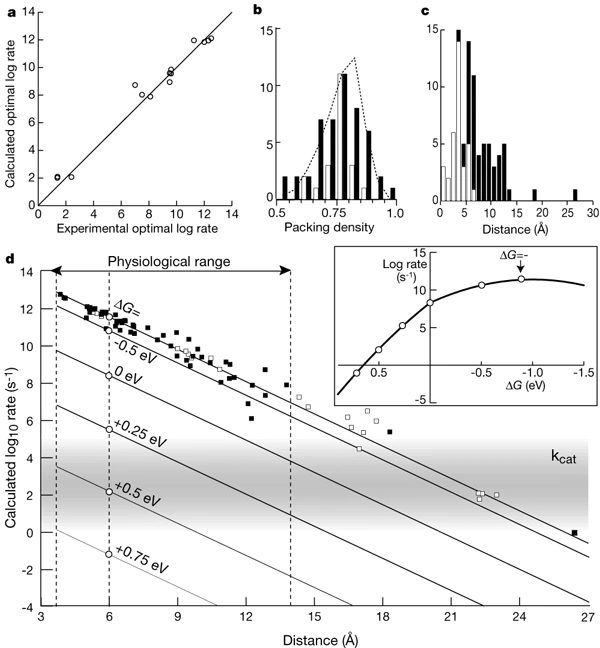</div>
<font size="2">**Figura 2.** Immagine tratta da https://www.nature.com/articles/46972/figures/1</font>.

## 2 PCA: teoria

Si consideri il set di punti di dati bidimensionali in Figura 3. Ci sono due definizioni della PCA che conducono allo stesso algoritmo. La prima consiste nella proiezione ortogonale dei dai (cerchetti rossi) su uno spazio lineare di dimensione inferiore, detto il <span style="color:blue">sottospazio principale</span> (in questo caso si tratta chiaramente di una retta), in modo tale che la varianza dei dati proiettati sulla retta (cerchetti verdi) sia massimizzata.

<pass/> <div style="width: 250px">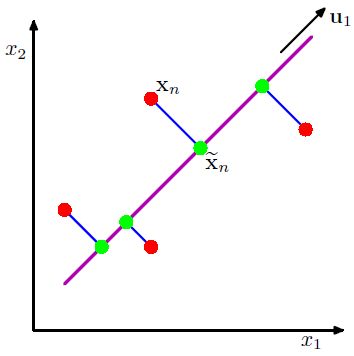</div>
<font size="2">**Figura 3.** Immagine tratta da https://boccignone.di.unimi.it/IN_2019_files/w5_pca.pdf.</font>

La seconda definizione equivalente consiste nella proiezione lineare che massimizza il "costo medio" della proiezione, definito come la distanza quadratica media tra i punti dei dati e le loro proiezioni. Le distanze tra i dati reali e quelli proiettati sono una misura degli errori commessi sositutendo il set di dati reali con quello dei dati approssimati che giacciono sulla retta di best fit PCA.  
Noi perseguiremo la prima definizione della PCA e, a tal fine, è bene rinfrescare i concetti di proiezione di un vettore in una certa direzione espressa in termini matriciali e di varianza e covarianza di un insieme di dati multidimensionali.

<pass/> <div style="width: 250px">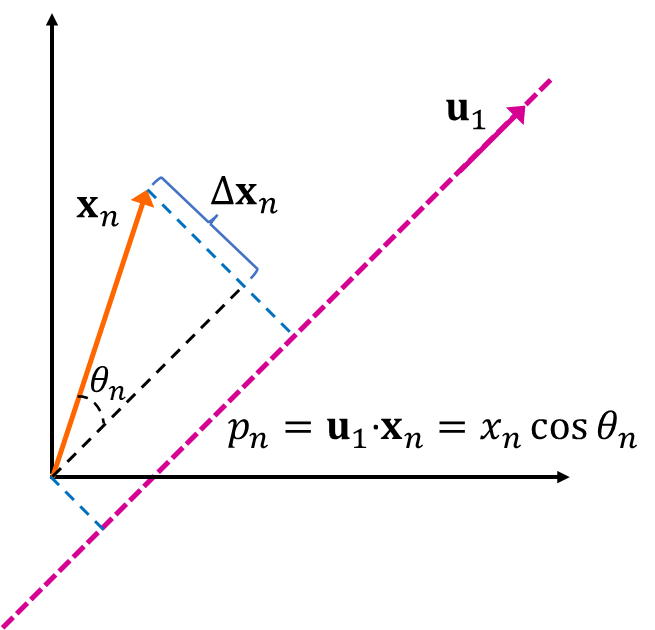</div>
<font size="2">**Figura 4.**</font>

### 2.1 Concetti preliminari

#### 2.1.1 Prodotto scalare in forma matriciale
La proiezione del data point $\textbf{x}_n$ nella direzione individuata dal vettore unitario (versore) $\textbf{u}_1$ è data da ${p_n}_1 = \textbf{u}_1 \cdot \textbf{x}_n = x_n\cos \theta$, dove $\theta$ è l'angolo tra i due vettori. In termini di componenti e per vettori che rappresentano dati di dimensione $D$, essendo $\textbf{x}_n = \left({x_n}_1, {x_n}_2, ..., {x_n}_D\right)$ e $\textbf{u}_1 = \left({u_1}_1, {u_1}_2, ..., {u_1}_D\right)$, il prodotto scalare si scrive ${p_n}_1 = \textbf{u}_1 \cdot \textbf{x}_n = {x_n}_1 {u_1}_1 + ... + {x_n}_D {u_1}_D$. Se rappresentiamo i vettori come vettori colonna, denotando con $\textbf{u}_1^T$ il trasposto del vettore $\textbf{u}_1$, si ha

$$
\textbf{x}_n = \begin{pmatrix} {x_n}_1 \\ \vdots \\ {x_n}_D \end{pmatrix}, \;\;\;\; \textbf{u}_1^T = \begin{pmatrix} {u_n}_1 & \ldots & {u_n}_D \end{pmatrix}
$$

e quindi
$$
{p_n}_1 = \textbf{u}_1^T \textbf{x}_n = \begin{pmatrix} {u_n}_1 & \ldots & {u_n}_D \end{pmatrix} 
\begin{pmatrix} {x_n}_1 \\ \vdots \\ {x_n}_D \end{pmatrix} = {x_n}_1 {u_1}_1 + ... + {x_n}_D {u_1}_D.
$$

#### 2.1.2 Proprietà di trasposizione di un prodotto di matrici
Si vede facilmente che valgono le seguenti proprietà di trasposizione.  
Data una matrice $\textbf{A}$, che in particolare può essere un vettore, si ha banalmnete
$$
\left(\textbf{A}^T\right)^T = \textbf{A}.
$$
Per la trasposta del prodotto di due matrici $\textbf{A}$ e $\textbf{B}$ si ha
$$
\left(\textbf{A}\textbf{B}\right)^T = \textbf{B}^T\textbf{A}^T.
$$
Così, per esempio, dalla combinazione delle due regole di sopra risulta
$$
\left(\textbf{A}^T\textbf{B}\right)^T = \textbf{B}^T\textbf{A}.
$$
Si noti, in particolare, che ${p_n}_1$ è uno scalare e si ha
$$
{p_n}_1 = {p_n}_1^T = \left(\textbf{u}_1^T \textbf{x}_n\right)^T = \textbf{x}_n^T\textbf{u}_1.
$$

#### 2.1.3 Decomposizione di vettori in forma matriciale
Iniziamo col considerare un vettore $\textbf{s}$ in un sistema di riferimento cartesiano e chiamiamo $\textbf{c}_1$, $\textbf{c}_2$ e $\textbf{c}_3$ i versori dei trei assi cartesiani. Si ha
$$
\textbf{s} = s_1\textbf{c}_1 + s_2\textbf{c}_2 + s_3\textbf{c}_3 = \sum_{i=1}^3 s_i\textbf{c}_i.
$$
Dal momento che i tre versori sono ortonormali, $\textbf{s} \cdot \textbf{c}_1 = s_1\textbf{c}_1 \cdot \textbf{c}_1 = s_1$ e così via; quindi, il vettore $\textbf{s}$ si può scrivere nella forma
$$
\textbf{s} = \sum_{i=1}^3 \left(\textbf{s} \cdot \textbf{c}_i\right)\textbf{c}_i.
$$
In forma matriciale (cioè, coinvolgendo prodotti matriciali di vettori riga e colonna), possiamo scrivere il vettore nelle forme equivalenti
$$
\textbf{s} = \sum_{i=1}^3 \left(\textbf{c}_i^T \textbf{s}\right)\textbf{c}_i = \sum_{i=1}^3 \textbf{c}_i\left(\textbf{c}_i^T \textbf{s}\right) 
= \sum_{i=1}^3 \left(\textbf{s}^T \textbf{c}_i\right)\textbf{c}_i = \sum_{i=1}^3 \textbf{c}_i\left(\textbf{s}^T \textbf{c}_i\right).
$$
Tali espressioni si possono banalmente generalizzare a un numero di dimensioni qualsiasi.

#### 2.1.4 Varianza e covarianza
Passiamo adesso a definire varianza e covarianza. Consideriamo prima una variabile scalare $X$ che assume $N$ valori $x_1, x_2, ..., x_N$. Si noti che adesso queste non sono le componenti di un vettore, ma gli $N$ valori (scalari) assunti dalla variabile in questione. Considerato il valore medio
$$
\overline{x} = \frac{1}{N}\sum_{n=1}^N x_n
$$
la corrispondente <span style="color:blue">varianza</span> della variabile aleatoria (o *random*) $X$ è data da
$$
C \equiv C_{XX} = \frac{1}{N}\sum_{n=1}^N \left(x_n - \overline{x}\right)^2 = 
\frac{1}{N}\sum_{n=1}^N\left(x_n - \overline{x}\right)\left(x_n - \overline{x}\right).
$$
Data un'altra variabile $Y$ con valori $y_1, y_2, ..., y_N$, la <span style="color:blue">covarianza</span> di $X$ e $Y$ è
$$
C_{XY} = \frac{1}{N}\sum_{n=1}^N \left(x_n - \overline{x}\right) \left(y_n - \overline{y}\right).
$$
Supponiamo adesso che $\textbf{X}$ sia una variabile vettoriale random di uno spazio euclideo di dimensione $D$ che può assumere i valori $\textbf{x}_1, \textbf{x}_2, ..., \textbf{x}_N$. Questo significa che ciascun valore è un vettore con $D$ componenti e la varianza diventa adesso la matrice
$$
\textbf{C} = \frac{1}{N}\sum_{n=1}^N\left(\textbf{x}_n - \overline{\textbf{x}}\right)\left(\textbf{x}_n - \overline{\textbf{x}}\right)^T
$$
dove
$$
\overline{\textbf{x}} = \frac{1}{N}\sum_{n=1}^N \textbf{x}_n
$$

Per semplificare la notazione, definiamo vettori di dati ottenuti da quelli di partenza sottraendone la media,
$$
\textbf{v}_n = \textbf{x}_n - \overline{\textbf{x}}, \;\;\;\; n = 1, 2, ..., N,
$$
cosicché
$$
\textbf{C} = \frac{1}{N}\sum_{n=1}^N\textbf{v}_n\textbf{v}_n^T.
$$
Si noti che
$$
\textbf{v}_n\textbf{v}_n^T = \begin{pmatrix} {v_n}_1 \\ \vdots \\ {v_n}_D \end{pmatrix} 
\begin{pmatrix} {v_n}_1 & \ldots & {v_n}_D \end{pmatrix} = \begin{pmatrix} {v_n}_1 {v_n}_1 & {v_n}_1 {v_n}_2 & \ldots & {v_n}_1 {v_n}_D \\ 
\vdots & \ddots & \vdots \\
{v_n}_D {v_n}_1 & {v_n}_D {v_n}_2 & \ldots & {v_n}_D {v_n}_D \end{pmatrix}
$$
e quindi
$$
\textbf{C} = \begin{pmatrix} C_{{v_n}_1 {v_n}_1} & C_{{v_n}_1 {v_n}_2} & \ldots & C_{{v_n}_1 {v_n}_D} \\ \vdots & \ddots & \vdots \\
C_{{v_n}_D {v_n}_1} & C_{{v_n}_D {v_n}_2} & \ldots & C_{{v_n}_D {v_n}_D} \end{pmatrix}.
$$
La matrice $\textbf{C}$ è prevalentemente chiamata in due modi diversi dalla comunità degli statistici: (i) la <span style="color:blue">varianza del vettore random $\textbf{X}$</span>, in quanto naturale generalizzazione del concetto di varianza unidimensionale a $D$ dimensioni; (ii) la <span style="color:blue">matrice di covarianza</span>, perché l'elemento generico di tale matrice, $C_{{v_n}_i {v_n}_j}$, è la covarianza delle componenti random $i$ e $j$ del vettore random $\textbf{X}$. Altri nomi usati per $\textbf{C}$ sono <span style="color:darkcyan">matrice di auto-covarianza</span> e <span style="color:darkcyan">matrice di varianza-covarianza</span>.

### 2.2 Formulazione della PCA basata sulla massima varianza

Il nostro obiettivo è di proiettare i dati $\{\textbf{v}_n\}_{n=1, 2, ..., N}$ su uno spazio euclideo di dimensione $M < D$ al contempo massimizzando la varianza del set di dati proiettato. Si noti che vi sono anche tecniche per determinare un valore appropriato di $M$ a cui fermare la riduzione dimensionale, anche se non ce ne occuperemo in questa lezione.

Partiamo col considerare la proiezione del set di dati su uno spazio unidimensionale ($M = 1$). La direzione di tale spazio è definita dal versore $\textbf{u}_1$ ($\textbf{u}_1^T\textbf{u}_1 = 1$). Si noti che $\textbf{u}_1$ è un vettore $D$-dimensionale che individua la direzione di uno spazio unidimensionale nello spazio a $D$ dimensioni. Per esempio, un versore nello spazio euclideo bidimensionale ha due componenti (cioè è un vettore di uno spazio bidimensionale, quindi un vettore bidimensionale o a due componenti) e individua la direzione di una retta, che è uno spazio unidimensionale, come nel caso di Figura 4.  
Ciascun punto di dato (qui riferito al valore medio), cioè ciascun vettore $\textbf{v}_n$, è proiettato su $\textbf{u}_1$, dando lo scalare $\textbf{u}_1^T\textbf{v}_n$. La matrice di covarianza dei dati proiettati è
$$
\frac{1}{N}\sum_{n=1}^N\textbf{u}_1^T\textbf{v}_n(\textbf{u}_1^T\textbf{v}_n)^T = 
\frac{1}{N}\sum_{n=1}^N\textbf{u}_1^T\textbf{v}_n\textbf{v}_n^T\textbf{u}_1 = 
\textbf{u}_1^T\frac{1}{N}\sum_{n=1}^N\textbf{v}_n\textbf{v}_n^T\textbf{u}_1 = \textbf{u}_1^T\textbf{C}\textbf{u}_1.
$$
Adesso, scriviamo la condizione di massimizzazione della varianza proiettata $\textbf{u}_1^T\textbf{C}\textbf{u}_1$ sotto la condizione di normalizzazione ad $1$ di $\textbf{u}_1$, cioè col vincolo che $1 - \textbf{u}_1^T\textbf{u}_1 = 0$ (*massimo vincolato*). A tal fine, si usa il <span style="color:blue">metodo dei moltiplicatori di Lagrange</span>, secondo il quale trovare il punto di massimo o minimo (in generale, un estremo) di una funzione $f$ soggetto alla condizione $\phi = 0$ (dove $\phi$ è un'altra funzione; il vincolo impone di trovare il punto di estremo della $f$ limitatamente ai range di valori delle variabili indipendenti per i quali si annulla la funzione $\phi$) è equivalente a trovare il punto di massimo o minimo non vincolato (o *incondizionato*) della funzione $f + \lambda\phi$, dove il numero $\lambda$ è un cosiddetto <span style="color:blue">moltiplicatore di Lagrange</span>. Nel nostro caso multidimensionale, vogliamo trovare il versore $\textbf{u}_1$ che corrisponde al massimo incodizionato di
$$
\textbf{u}_1^T\textbf{C}\textbf{u}_1 + \lambda_1\left(1 - \textbf{u}_1^T\textbf{u}_1\right).
$$
Dobbiamo quindi effettuare la derivata (che, in questo caso, trattandosi di matrici e vettori, è un gradiente) della quantità di sopra rispetto a $\textbf{u}_1$ e porla uguale a zero. Tale operazione è una generalizzazione della derivata di un prodotto di funzioni scalari e su può vedere facilmente che porta al risultato
$$
\textbf{C}\textbf{u}_1 - \lambda_1\textbf{u}_1 = 0
$$
da cui
$$
\textbf{C}\textbf{u}_1 = \lambda_1\textbf{u}_1.
$$
Tale equazione ci dice che <span style="color:darkcyan">$\lambda_1$ deve essere un autovalore di $\textbf{C}$</span> e quindi <span style="color:darkmagenta">$\textbf{u}_1$ deve essere un autovettore della matrice di covarianza $\textbf{C}$.</span> Moltiplicando entrambi i lati dell'equazione da sinistra per $\textbf{u}_1^T$ otteniamo
$$
\textbf{u}_1^T\textbf{C}\textbf{u}_1 = \lambda_1
$$
e quindi la varianza del set di dati trasformato è massima quando si proietta sull'autovettore $\textbf{u}_1$ che corrisponde all'autovalore più grande. In altre parole, si calcolano gli autovalori e i corrispondenti autovettori di $\textbf{C}$, si considera l'autovettore che corrisponde all'autovalore più grande, che qui chiamiamo $\lambda_1$, e si proiettano i punti dei dati (*data points*) nella direzione individuata da tale autovettore.

A questo punto, abbiamo un set di dati proiettato (che rappresenta la prima componente principale del set) $\{\textbf{v}'_n\}_{n=1, 2, ..., N}$ con $\textbf{v}'_n = \left(\textbf{u}_1^T\textbf{v}_n\right)\textbf{u}_1 = \left(\textbf{v}_n^T\textbf{u}_1\right)\textbf{u}_1$, avendo tralasciato le componenti dei vettori di dati ortogonali alla componente principale, cioè
$$
\Delta\textbf{v}_n = \textbf{v}_n - \textbf{v}'_n = \sum_{i=1}^D \left(\textbf{v}_n^T\textbf{u}_i\right)\textbf{u}_i - \left(\textbf{v}_n^T\textbf{u}_1\right)\textbf{u}_1 = \sum_{i=2}^D \left(\textbf{v}_n^T\textbf{u}_i\right)\textbf{u}_i.
$$
Tali vettori giacciono nello spazio ortogonale al sottospazio principale e possono essere considerati come i vettori spostamento che portano dai vettori approssimati $\textbf{v}'_n$, che giacciono lungo la direzione di $\textbf{u}_1$, ai vettori di dati corretti $\textbf{v}_n$, ovverosia i vettori di errore: i vettori che descrivono gli errori sui dati commessi sostituedno $\textbf{v}_n$ con i vettori proiettati $\textbf{v}'_n$ e quindi, complessivamente, la distorsione del set di dati originario introdotta usandone la componente principale. Nel caso bidimensionale, tali vettori sono semplicemente i vettori ortogonali alla direzione principale definita da $\textbf{u}_1$ la cui lunghezza è indicata in blu in Figura 3. La distorsione è quantificata da
$$
J_1 \equiv \frac{1}{N}\sum_{n=1}^N |\Delta\textbf{v}_n|^2 = \frac{1}{N}\sum_{n=1}^N \Delta\textbf{v}_n^T\Delta\textbf{v}_n
$$
Come mostrato nella nota sottostante, tale quantità è uguale alla traccia della matrice di covarianza (cioè la somma dei suoi elementi di matrice diagonali, che si può scrivere come la somma degli autovalori, come si vede dopo aver diagonalizzato la matrice) meno l'autovalore principale già tenuto in considerazione. In altre parole, la quantità $J_1$ è data dalla somma degli autovalori non ancora tenuti in conto:
$$
J_1 = \sum_{i=2}^D \lambda_i
$$
Se si ripercorre la procedura usata sopra per trovare la componente principale con riferimento allo spazio ortogonale al sottospazio principale, in cui giacciono i vettori $\Delta\textbf{v}_n$, si vede facilmente che si ottiene la seconda più grande varianza dei dati ulteriormente proiettati scegliendo il secondo autovalore più grande della matrice di covarianza $\textbf{C}$, che chiamiamo $\lambda_2$. La distorsione dei dati rimanente diventa allora
$$
J_2 = \sum_{i=3}^D \lambda_i.
$$
A questo punto è chiaro che il fulcro dell'approccio consiste nel trovare gli autovalori ed autovettori della matrice di covarianza ed effettuare le operazioni di proiezione desiderate per conseguire la precisione voluta.

#### 2.2.1 Nota
Considerato che i vettori $\textbf{u}_i$ sono ortonormali, per cui $\textbf{u}_i^T\textbf{u}_j = \delta_{ij}$, e che $\textbf{v}_n^T\textbf{u}_i = \textbf{u}_i^T\textbf{v}_n$ è uno scalare, per cui la sua posizione in un prodotto può essere variata liberamente e la sua trasposizione porta allo stesso scalare, si ha
$$
\begin{align}
 \Delta\textbf{v}_n^T\Delta\textbf{v}_n &= \left[\sum_{i=2}^D \left(\textbf{v}_n^T\textbf{u}_i\right)\textbf{u}_i\right]^T
 \sum_{j=2}^D \left(\textbf{v}_n^T\textbf{u}_j\right)\textbf{u}_j \notag \\[6pt]
 &= \sum_{i=2}^D \sum_{j=2}^D \left(\textbf{v}_n^T\textbf{u}_i\right)\textbf{u}_i^T 
 \textbf{u}_j\left(\textbf{v}_n^T\textbf{u}_j\right)
 = \sum_{i=2}^D \sum_{j=2}^D \left(\textbf{v}_n^T\textbf{u}_i\right)\delta_{ij}\left(\textbf{v}_n^T\textbf{u}_j\right) \notag \\[6pt]
 &= \sum_{i=2}^D \textbf{v}_n^T\textbf{u}_i\textbf{v}_n^T\textbf{u}_i 
 = \sum_{i=2}^D \textbf{u}_i^T\textbf{v}_n\textbf{v}_n^T\textbf{u}_i 
 = \textbf{u}_i^T\left(\sum_{i=2}^D \textbf{v}_n\textbf{v}_n^T\right)\textbf{u}_i \notag \\[6pt]
\end{align}
$$
e di conseguenza
$$
\begin{align}
 J_1 &= \frac{1}{N}\sum_{n=1}^N \Delta\textbf{v}_n^T\Delta\textbf{v}_n 
 = \frac{1}{N}\sum_{n=1}^N \textbf{u}_i^T\left(\sum_{i=2}^D \textbf{v}_n\textbf{v}_n^T\right)\textbf{u}_i \notag \\[6pt]
 &= \sum_{i=2}^D \textbf{u}_i^T \left(\frac{1}{N}\sum_{n=1}^N \textbf{v}_n\textbf{v}_n^T\right)\textbf{u}_i 
 = \sum_{i=2}^D \textbf{u}_i^T\textbf{C}\textbf{u}_i = \sum_{i=2}^D \lambda_i. \notag \\[6pt]
\end{align}
$$

## 3 PCA: esempio applicativo

### 3.1 Uso del modulo PCA di *sklearn* e rappresentazione delle componenti principali

La PCA è un metodo veloce e flessibile molto usato per la riduzione dimensionale dei dati nell'apprendimento non supervisionato (in inglese, *unsupervised learning*).  
<span style="color:blue">Scikit-Learn</span>, noto anche come <span style="color:blue">sklearn</span>, è una libreria open source in linguaggio Python che fornisce versioni efficienti di un gran numero di algoritmi di ML. Tale pacchetto è in dotazione di Anaconda come `sklearn` e contiene un modulo `PCA` appunto per effettuare la PCA. Adesso importiamo `sklearn` e altre librerie che saranno utilizzate nel prosieguo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Come abbiamo visto sopra, il significato della PCA è meglio visualizzato usando set di dati (*dataset*) bidimensionali. Creeremo un dataset bidimensionale sfruttando i metodi <span style="color:blue">rand</span> e <span style="color:blue">randn</span> della classe <span style="color:blue">numpy.random.RandomState()</span> di `Numpy`.  
`numpy.random.RandomState()` può essere utilizzata con un parametro opzionale, che è il cosiddetto seme (in inglese <span style="color:blue">seed</span>, chiamato anche <span style="color:blue">random seed</span>). Il `seed` è un numero usato per inizializzare un generatore di numeri pseudorandom. L'uso del `seed` consente di riprodurre esattamente (se necessario per uso futuro) una certa sequenza di numeri pseudorandom. Infatti, reinizializzando il generatore con lo stesso `seed` si riotterrà la stessa sequenza.  
Il metodo `rand` ha la sintassi

`random.RandomState.rand(d0, d1, ..., dn)`

Esso crea una array della forma data (per esempio, per `d0 = 2` e `d1 = 2` si ottiene una matrice $2 \times 2$) che riempie con numeri random ricavati da una distribuzione uniforme sull'intervallo $[0,1[$.  Il metodo `randn` ha una sintassi simile, ma genera numeri random secondo una distribuzione Gaussiana di valore medio zero e varianza 1.  
A questo punto creiamo 200 punti random e li visualizziamo con le istruzioni seguenti:

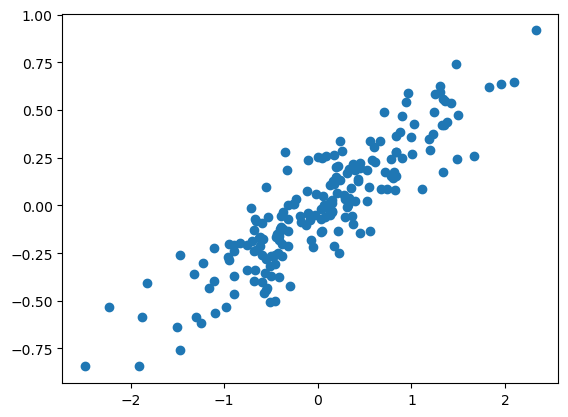

In [2]:
rng = np.random.RandomState(1)
M1 = rng.rand(2, 2)
M2 = rng.randn(2, 200)
V = np.dot(M1, M2).T
plt.scatter(V[:, 0], V[:, 1]);

<font size="2">**Figura 5.**</font>

Sopra l'attributo <span style="color:blue">T</span> è usato per fare la trasposta della matrice di numeri random $2 \times 200$ risultante dal prodotto di una matrice di numeri random $2 \times 2$ e una $2 \times 200$. In tal modo, si ottiene la matrice `V`, in cui i valori della prima colonna rappresentano le componenti $x$ dei 200 punti (vettori) di dati e quelli della seconda colonna le loro componenti $y$. La moltiplicazione per la matrice M1 consente di creare un set di punti di dati sparpagliati in modo random intorno a una certa direzione. Notate, infatti, quanto segue e confrontate con il dataset risultante in Figura 5.

[[4.17022005e-01 1.14374817e-04]
 [7.20324493e-01 3.02332573e-01]]


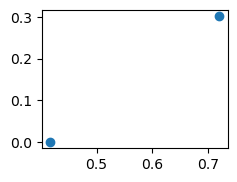

In [3]:
M1T = M1.T
print(M1T)
plt.figure(figsize=(2.4,1.8))
plt.scatter(M1T[:, 0], M1T[:, 1]);

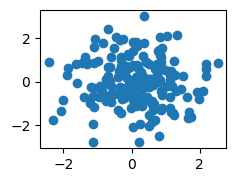

In [4]:
M2T = M2.T
plt.figure(figsize=(2.4,1.8))
plt.scatter(M2T[:, 0], M2T[:, 1]);

Si vede chiaramente che vi è una relazione approssimativamente lineare tra le variabili $x$ e $y$. Nel caso in cui si effettua una <span style="color:darkcyan">regressione lineare</span> dei dati, si trova la funzione che meglio descrive la relazione tra $x$ e $y$, in modo tale da poter poi predire i valori della variabile dipendente in corrispondenza a valori diversi della variabile indipendente. L'approccio del PCA usato nel contesto del ML si propone soprattutto di conoscere la relazione tra i valori di $x$ e $y$. Nella PCA tale relazione è quantificata trovando gli assi principali dei dati e usandoli per descrivere il dataset. A tal fine usiamo, come detto sopra, lo stimatore di PCA (*PCA estimator*) di `sklearn` attraverso le istruzioni seguenti:

In [5]:
pca = PCA(n_components=2)
pca.fit(V)

PCA(n_components=2)

La prima istruzione invoca la classe PCA, il cui primo parametro, e l'unico qui adoperato, rappresenta il numero di componenti da mantenere. Nella seconda istruzione usiamo il metodo `fit` di tale classe per effettuare l'analisi sul dataset `V`. Il fit apprende alcune quantità a partire dai dati. Le più importanti sono le "componenti" (in inglese *components*) e la "varianza spiegata" (*explained variance*). A tal fine, stampiamo prima l'attributo `components_` di `pca`:

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Tale attributo consiste di una matrice detta *feature vector*. Le colonne di tale matrice contengono gli autovettori della matrice di covarianza (quindi le componenti principali) che abbiamo deciso di mantenere. Usando le notazioni della parte teorica, tali vettori sono $\textbf{u}_1$ e $\textbf{u}_2$.  
La "varianza spiegata" è una misura di quanta parte della varianza totale del dataset originario è descritta (spiegata) da ciascuna componente principale; vale a dire, la varianza spiegata di una componente principale è uguale all'autovalore associato con tale componente, come spiegato nella parte teorica. Nel PCA di `sklearn`, tale informazione si trova nell'attributo `explained_variance_` di `pca`, che contiene il set degli autovalori più grandi della matrice di covarianza di `V` che sono presi in considerazione. Così, l'istruzionene

In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


fosnisce gli autovalori corrispondenti agli autovettori di cui sopra, cioè $\lambda_1$ e $\lambda_2$. Chiaramente, `pca.explained_variance_[i]` fornisce l'autovalore associato all'iesima componente principale. Per esempio,

In [8]:
print(pca.explained_variance_[1])

0.018477895513562572


e l'autovalore viene così mostrato con maggiore precisione numerica. La varianza spiegata complessiva delle prime k componenti principali è data dalla somma degli primi k autovalori più grandi. In generale, si ottiene tramite `pca.explained_variance_[:k].sum()`. Nel caso presente si ha semplicemente

In [9]:
pca.explained_variance_[:2].sum()

0.7810093963961741

Possiamo visualizzare i valori numerici di sopra (che descrivono le componenti principali) come vettori sovrapposti ai dati di input, sfruttando gli autovettori per definire le direzioni di tali vettori e gli elementi della `explained_variance_` per definire le lunghezze dei vettori. A tal fine, ricordiamo che per dati random che seguono una distribuzione normale con varianza $\sigma^2$, e quindi deviazione standard $\sqrt{\sigma^2} = \sigma$, si usa la cosidetta <span style="color:darkcyan">Regola Empirica</span>, secondo la quale ci si limita a considerare i valori entro 3 deviazioni standard dalla media (in tal modo ci si aspetta di cogliere il 99.7% dei dati). Così, per esempio, un vettore nella direzione di $\textbf{u}_1$ cha abbraccia essenzialmente tutta l'estensione della distribuzione dei dati in tale direzione è dato da $3\sqrt{\lambda_1}\textbf{u}_1$. Costruiamo la funzione seguente per disegnare i vetori:

In [10]:
def draw_vector(a0, a1, ax=None):
    ax = ax or plt.gca()
    arp=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', a1, a0, arrowprops=arp)

I parametri di input saranno le posizioni della coda e della punta del vettore da rappresentare, che ho chiamato `a0` e `a1`, nonché l'oggetto `Axes` (`ax`) che conterrà le frecce. La funzione <span style="color:blue">plt.gca</span> del modulo `matplotlib.pyplot` consente di creare un `Axes` su una data figura se non ve ne è già uno. Tale funzione sarà quindi sfruttata per disegnare la freccia che rappresenta la prima componente principale. Per costruire le frecce sfruttiamo la funzione `annotate` (più precisamente, `matplotlib.axes.Axes.annotate`). Tale funzione consente di inserire nella figura delle annotazioni, come per esempio del testo che spiega o mette in evidenza alcuni dei dati visualizzati. La sua sintassi è

`annotate(text, xy, xytext=None, ..., arrowprops=None, ...)`

`xy` è il punto $(x, y)$ a cui deve fare riferimento l'annotazione. La stringa `text` è il testo dell'annotazione, collocato nella posizione `xytext`, che quindi è generalmente prossima alla posizione `xy`.

<pass/> <div style="width: 200px">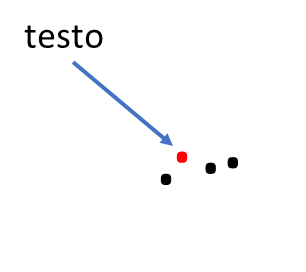</div>

La funzione `annotate` consente anche di creare, con diversi stili, una freccia che va dal testo ai dati a cui esso si riferisce. In realtà, qui stiamo sfruttando proprio tale aspetto della funzione e non vogliamo aggiungere alcuna annotazione, per cui la stringa di testo è vuota: `''`. La coda della freccia sarà collocata nella posizione in cui si scriverebbe il testo qualora vi fosse (cioè `xytext` coincide con `a0`) e la sua punta nella posizione `a1 = xy`. `arrowprops` è un dizionario che descrive le proprietà della freccia da disegnare. Quando si definisce lo stile della freccia tramite `arrowstyle`, come sopra, si possono anche specificare altre caratteristiche della freccia. Per esempio, se vogliamo sia scrivere del testo che disegnare la freccia, vogliamo far partire la freccia un po' oltre la posizione `a0` del testo e magari farla terminare un po' prima del punto di dato indicato, cioè di `a1`. In tal caso, possiamo restringere la freccia da un lato e dall'altro mediante `shrinkA` e `shrinkB` (in inglese `to shrink` significa restringere). Siccome i valori di default di tali parametri sono `2 points` e noi voglianmo invece rappresentare una freccia che vada esattamente da `a0` ad `a1`, senza scrivere alcun testo e senza riferimento ad alcuno specifico data point, abbiamo specificato che deve essere `shrinkA=0` e `shrinkB=0`.  
A questo punto, possiamo usare la funzione `scatter` di `matplotlib.pyplot` assieme alla funzione da noi creata per graficare i dati e sovrapporre le frecce che indicano le due componenti principali:

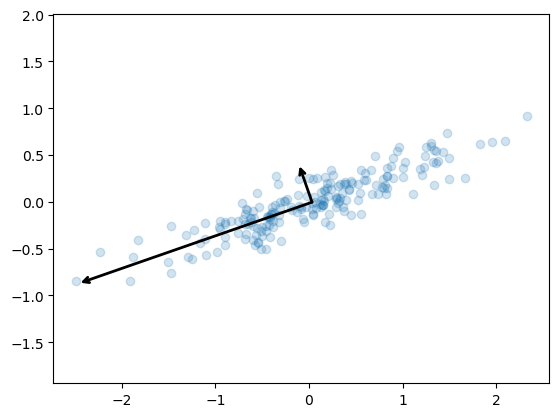

In [11]:
plt.scatter(V[:, 0], V[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    L = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + L)
plt.axis('equal');

Nell'invocare la funzione `scatter`, in aggiunta alle necessarie coordinate dei data points, come parametro di ingresso opzionale abbiamo considerato solo `alpha`, che consente di regolare la trasparenza dei simboli dei data points. Abbiamo usato `alpha=0.2` (`0` e `1` corrispondono, rispettivamente, a trasparente e opaco) per mettere in maggior risalto le frecce. Abbiamo anche fatto uso della funzione <span style="color:blue">zip()</span> di Python, che consente di aggregare iterabili in una tupla e fornisce quindi tale tupla.  
Nell'invocare la funzione `draw_vector` da noi creata, abbiamo posto `a0` uguale a `pca.mean_`, cioè un attributo di `pca` (stimato empiricamente dal *training set* quando la PCA è usata in ML) che qui corrisponde ai valori medi di $x$ e $y$ del set di dati.
Infine, abbiamo usato la funzione `matplotlib.pyplot.axis` per settare una proprietà degli assi: attraverso il parametro di formato stringa `'equal'` abbiamo richiesto che gli assi vengano rappresentati nelle stesse proporzioni, cioè che venga usata la stessa unità di lunghezza grafica sui due assi. Altrimenti, il rapporto reale tra le lunghezze dei due vettori e la loro reale orientazione reciproca verrebbero falsati nel rendere la figura, il che è chiaramente indesiderato. Infatti, sappiamo che gli *assi principali* (o *direzioni principali*) dei dati sono ortogonali e la lunghezza di una freccia indica quanto importante sia quell'asse nel descrivere la distribuzione dei dati. Più precisamente, tale lunghezza è una misura della varianza dei dati quando questi vengono proiettati su tale asse principale. Le proiezioni di un data point sugli assi principali sono le sue componenti principali.

#### 3.1.1 Nota su una rappresentazione dei dati di interesse per ML
Si noti che sopra abbiamo rappresentato i dati per come sono, con le loro coordinate originarie. Con riferimento alla teoria, abbiamo mostrato le posizioni definite dai vettori $\textbf{v}_n$ nel piano cartesiano i cui assi sono definiti dai versori $\textbf{c}_1$ e $\textbf{c}_2$. Vogliamo adesso riorientare i dati, rappresentandoli rispetto agli assi individuati dalle componenti principali, le cui direzioni sono definite da $\textbf{u}_1$ e $\textbf{u}_2$. Rispetto a tali assi, le componenti del vettore $\textbf{v}_n$ saranno $\textbf{u}_1^T\textbf{v}_n$ e $\textbf{u}_2^T\textbf{v}_n$. Inoltre, i dati possono essere riscalati, in modo tale che le lunghezze dei due vettori principali diventino le stesse; quindi i dati verranno espansi nella direzione del vettore inizialmente più corto $\textbf{u}_2$. Tale riscalamento (in inglese, *rescaling*) è parte di una procedura chiamata <span style="color:darkmagenta">whitening</span> (sbiancamento) che viene tipicamente usata in ML per rendere i dati di input meno ridondanti e chiari (nel training con immagini, pixel adiacenti sono altamente correlati e, in quanto tali, ridondanti). Ciò fa perdere l'informazione sul peso relativo delle componenti principali ma aiuta in termini di accuratezza predittiva, che è importante in ML.  
Quanto sopra può essere realizzato col codice seguente (chi è interessato, può approfondire):

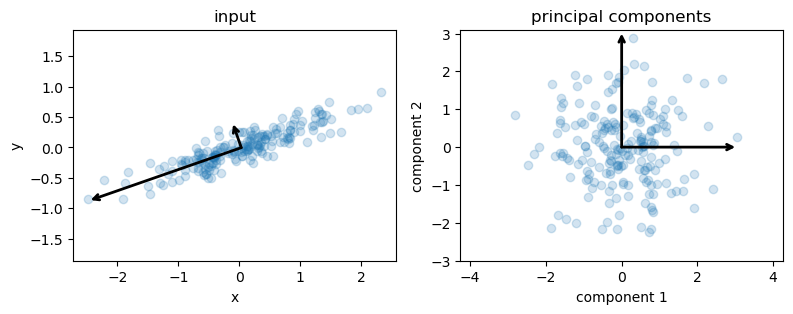

In [12]:
pca = PCA(n_components=2, whiten=True)
pca.fit(V)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.2)

# rappresentazione dei dati: assi cartesiani iniziali
ax[0].scatter(V[:, 0], V[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    L = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + L, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# assi lungo le componenti principali
V_pca = pca.transform(V)
ax[1].scatter(V_pca[:, 0], V_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

fig.savefig('PC_data.png')

### 3.2 Riduzione della dimensionalità mediante la PCA

Sopra abbiamo esplorato entrambe le componenti principali fornite dalla PCA per il set di dati utilizzati. Adesso, come abbiamo discusso nella parte teorica, vogliamo usare la PCA per una riduzione di dimensionalità. Ciò significa tralasciare una o più delle componenti principali più piccole, ottenendo un set di dati proiettati di ridotta dimensionalità che preserva la massima varianza. Ecco un esempio di utilizzo della PCA come trasformazione per riduzione dimensionale:

In [13]:
pca = PCA(n_components=1)
pca.fit(V)
V_pca = pca.transform(V)
print("original shape: ", V.shape)
print("transformed shape:", V_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


Si noti che stavolta nella prima riga abbiamo scelto `n_components=1` e nella terza riga abbiamo usato il metodo `transform` di `pca`, che proietta `V` sulla prima componente principale. Questo significa ottenere le quantità scalari $\textbf{u}_1^T\textbf{v}_n$. Tali quantità rappresentano le proiezioni dei dati sulla retta di direzione $\textbf{u}_1$ e quindi definiscono le posizioni dei dati proiettati nello spazio unidimensionale costituito da tale retta.
Adesso, per comprendere l'effetto di tale riduzione di dimensionalità, effettuiamo una trasformazione inversa (usando il metodo `inverse_transform` di `pca`) che associa due coordinate nello spazio bidimensionale originario a ciascuno dei punti proiettati, così permettendoci di diagarammarli assieme ai dati originali (si vedano le figure sottostanti):

<pass/> <div style="width: 550px">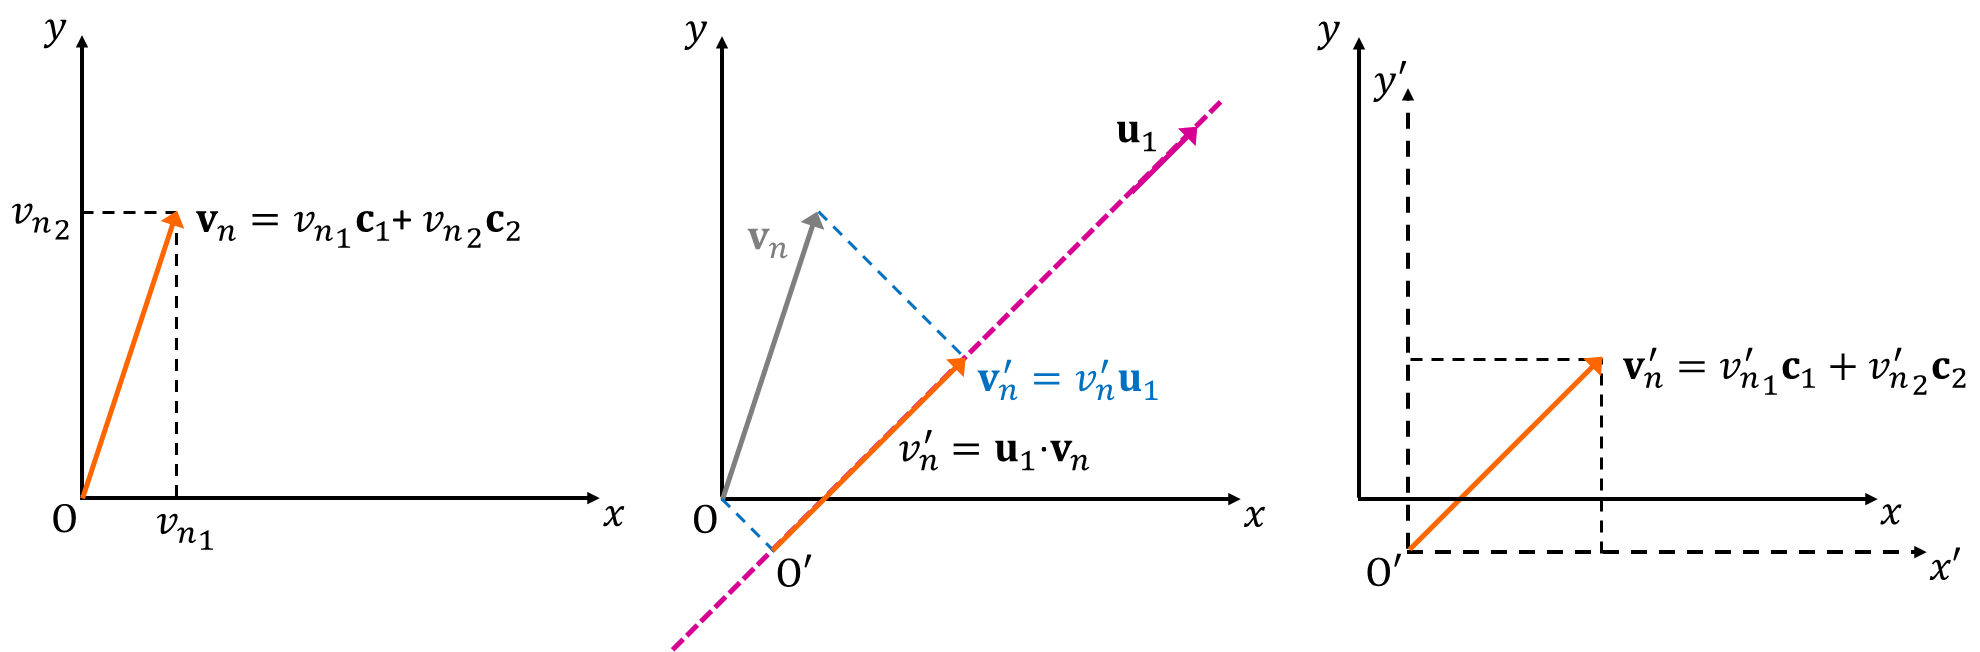</div>

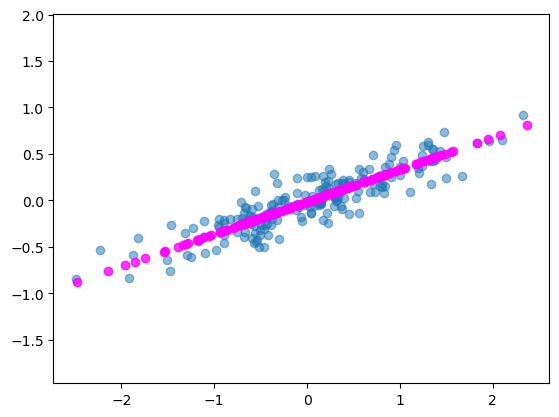

In [14]:
V_new = pca.inverse_transform(V_pca)
plt.scatter(V[:, 0], V[:, 1], alpha=0.5)
plt.scatter(V_new[:, 0], V_new[:, 1], alpha=0.8, color='magenta')
plt.axis('equal');

I punti color magenta rappresentano il dataset proiettato, cioè la componente principale del dataset originario. Si vede qui chiaramente il significato di riduzione dimensionale: le informazioni risultanti dallo sparpagliamento dei dati lungo l'asse principale di importanza inferiore, individuato da $\textbf{u}_2$, sono rimosse, lasciando solo le componenti dei dati nella direzione principale $\textbf{u}_1$, in cui lo sparpagliamento dei dati è massimo. La frazione di varianza complessiva eliminata (che è espressa, anche visualmente, dallo sparpagliamento dei dati nella direzione ortogonale a $\textbf{u}_1$, cioè lungo la direzione di $\textbf{u}_2$) è approssimativamente una misura di quanta “informazione” viene scartata in questa riduzione della dimensionalità.  
Il dataset di dimensione ridotta è sufficiente per preservare e codificare la relazione principale (in questo caso, una relazione di linearità) tra i punti, nonostante la riduzione di dimensione del 50%.